# Skill Check 6

The block below imports the necessary packages and sets up the "blob" dataset you will use in this example and sets the random seed to ensure reproducible results.

In [1]:
import numpy as np
import pylab as plt

from sklearn.datasets import make_blobs

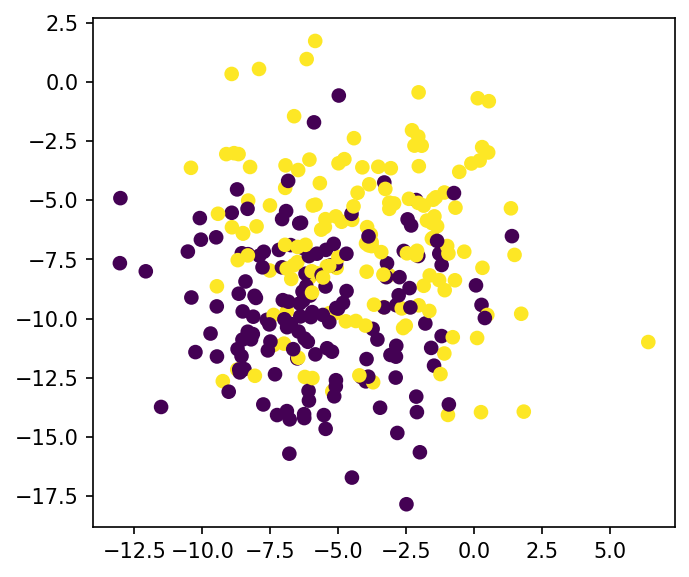

In [2]:
np.random.seed(65)

X_blob, y_blob = make_blobs(n_samples = 300, centers = 2, cluster_std = 3, n_features = 2)

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob);

## 1. Perceptron Loss Function (45 pts)

Let's create a perceptron loss function by hand. The perceptron loss function discriminates between two different classes as follows:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i = 1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i = -1$ (class 0)

Then, the perceptron loss function calculates $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. In this problem, you will play with `X_blob` and `y_blob`.

You may want to use `add_intercept` and `linear_classifier` functions through this problem.

In [3]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    X_intercept = np.append(intercept, X, 1)
    return X_intercept

def linear_classifier(X, w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept, w)
    return [1 if pi > 0 else -1 for pi in p]

### 1a: Rescaling the target vector for the perceptron loss function

First, we need to rescale the `y_blob` to fit the definition we made. By default, `y_blob` consists of classes of `0` and `1`, but for the loss function we need classes to be labeled by `-1` and `1`. Name the rescaled `y_blob` as `y_blob_rescaled`. (15 pts)

In [4]:
########################################
# Start your code here
y_blob_rescaled = 2 * y_blob - 1
########################################

In [5]:
assert y_blob_rescaled.shape == (300,), "y_blob_rescaled not in a correct shape"
assert np.isclose(np.linalg.norm(y_blob_rescaled), 17.320508075688775), "y_blob_rescaled not correct"

### 1b: Perceptron loss function

Create a function `perceptron` that calculates the $\sum_{i} max(0, -y_i\bar{\bar{X}}\vec{w})$. It should take the parameters as follows: (15 pts)

- w: parameter vector $\vec{w}$ (numpy.ndarray)
- X: feature matrix $\bar{\bar{X}}$ (numpy.ndarray, default value = `X_blob`)
- y: target classes $y_i$ (numpy.ndarray, default value = `y_blob_rescaled`)

In [6]:
########################################
# Start your code here
def perceptron(w, X = X_blob, y = y_blob_rescaled):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept, w)
    
    return sum(np.maximum(0, -y * Xb))
########################################

In [7]:
w1 = [10, 4, -10]
assert np.isclose(perceptron(w1), 12661.214132428053), "test run 1 failed"

w2 = [12, 4, -5]
assert np.isclose(perceptron(w2, X_blob, y_blob), 132.29786203856582), "test run 2 failed"

### 1c: Training a perceptron model

Find the optimal weight vector by using `scipy.optimize.minimize` function. You should use the `L-BFGS-B` algorithm for minimizing the perceptron loss function, and all other settings of `minimize` should be the default. The resulting optimized weight vector should be named as `w_opt`. The initial weight vector `w_init` is given for you. (5 pts)

In [8]:
from scipy.optimize import minimize

w_init = [30, 20, -50]

In [9]:
########################################
# Start your code here
res = minimize(perceptron, w_init, method = 'L-BFGS-B')
w_opt = res.x
########################################

In [10]:
assert np.isclose(np.linalg.norm(w_opt), 5.231030005761512e-08), "w_opt not correct"
assert np.isclose(w_opt[0], -4.732881886171775e-08), "w_opt not correct"

### 1d: Metrics for assessing classification models

Report the accuracy, precision, and recall of your trained model as `accuracy`, `precision`, and `recall`, respectively. Positive refers to class 1 and negative refers to class -1. (10 pts)

In [11]:
########################################
# Start your code here
from sklearn.metrics import accuracy_score, precision_score, recall_score

yhat = linear_classifier(X_blob, w_opt)

accuracy = accuracy_score(y_blob_rescaled, yhat)
precision = precision_score(y_blob_rescaled, yhat)
recall = recall_score(y_blob_rescaled, yhat)
########################################

In [12]:
assert np.isclose(accuracy*precision*recall, 0.08617199391171994), "classficiation metrics not correct"
assert np.isclose(accuracy+precision+recall, 1.325205479452055), "classification metrics not correct"

## 2. Support Vector Machine (55 pts)

In this problem, you will make use of the built-in support vector machine classifier (SVC) from the `scikit-learn` package.

### 2a: Importing the SVC object
 First, import a `SVC` object from `sklearn.svm`. (10 pts)

In [13]:
########################################
# Start your code here
from sklearn.svm import SVC
########################################

In [14]:
assert SVC.__init__, "SVC not imported"

### 2b: Setting up a kernel support vector classifier

Declare a `SVC` object `svc` with `kernel='rbf'`. (15 pts)

In [15]:
########################################
# Start your code here
svc = SVC(kernel = 'rbf')
########################################

In [16]:
assert svc.kernel == 'rbf', "SVC kernel not correct"

### 2c: Optimizing SVC hyperparameters with GridSearchCV

Given the list of $\alpha$ below, find the optimum $\alpha$ that returns the highest accuracy score using `GridSearchCV` for `X_blob` and `y_blob_rescaled`. You need to use 5-fold cross validation during hyperparameter tuning. Report the optimum $\alpha$ as `opt_alpha` and corresponding mean cross-validated accuracy score `opt_cv_acc`. (15 pts)

Hint: Remember that $\alpha$ is inversely proportional to the $C$ value used in the SVC loss function.

In [17]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([1e-6, 1e-5, 1e-4, 1e-3])

In [18]:
########################################
# Start your code here
param_grid = {'C': 1 / alphas}

gcv = GridSearchCV(svc, param_grid, cv = 5)
gcv.fit(X_blob, y_blob_rescaled)

opt_alpha = 1 / gcv.best_estimator_.C
opt_cv_acc = gcv.best_score_
########################################

In [19]:
assert np.isclose(opt_alpha * opt_cv_acc, 0.00067)

### 2d: Optimizing precision instead of accuracy

One nice feature of `GridSearchCV` is that you can optimize the performance with different scoring metrics. This may result in the different set of optimized hyperparameters. For classification, `GridSearchCV` computes the accuracy score by default. Let's see how `opt_alpha` will change as you compare the precision score during cross-validation. Repeat the same process above, but set `scoring = 'precision'` for `GridSearchCV`. Report the optimal `alpha` as `opt_alpha_prec` and corresponding mean cross-validated precision score `opt_cv_prec`. (15 pts)

In [20]:
########################################
# Start your code here
gcv = GridSearchCV(svc, param_grid, cv = 5, scoring = 'precision')
gcv.fit(X_blob, y_blob_rescaled)

opt_alpha_prec = 1 / gcv.best_estimator_.C
opt_cv_prec = gcv.best_score_
########################################

In [21]:
assert np.isclose(opt_alpha_prec / opt_cv_prec, 0.001482140877483721)